# --> FOR NIH REPORTER DATA <--


#### NOTE: The publication uses iSearch data, and not all grant mechanisms overlap with Reporter.  iSearch also uses the specific aims in it's search.  This results in small differences in the plots below with those of the publication.  See the other github file "DHT Portfolio Analysis" for iSearch data.
=============================================================================================

# Digital Health Portfolio Analysis Scripts
## For any questions, please contact the corresponding author of the publication
==============================================================================================

### Files needed to be placed in the datapath folder specified below include:
- Grant portfolio downloaded from publicly available NIH Reporter Grants Module: ttps://reporter.nih.gov
    - filename labeled here as: 'Reporter_SearchResult_Export_06Aug2024_060442.xlsx' 
    - -link: https://reporter.nih.gov/search/7mdx8PkeIk2QW5JBbwGDgA/projects
- NIH Budgets per IC: https://report.nih.gov/funding/nih-budget-and-spending-data-past-fiscal-years/budget-and-spending
    - Grants, Contracts, and Other Mechanisms: Awards, average funding, and total funding by Institute/Center (~160KB)
    - filename 'T106 2023 RES GR_OTHER MECH and CNTRCTS_Num and Tot and Avg Fund by IC and Mech.xlsx'
- Excel of IC Names and Acronyms needed to translate between different dataframes here.  Ths is in the github folder.
    - filename: IC_Names.xlsx

### Search Terms: "decentralized trial",  "remote trial", "virtual trial", "digital health", "digital health technology", "digital health technologies", "mobile app", "mobile application", "mobile health", "mobile health technology", "mobile health technologies", mhealth, "smart connected health", "remote patient monitoring", "connected home health", "wearable device", wearable, accelerometer, accelerometry, actigraph, actigraphy, "remote healthcare delivery", "virtual care", "digital patient engagement", telehealth, telemedicine. 

In [1]:
datapath='C:\\Users\\radmantc\\Documents\\Digital Health Portfolio Analysis\\MasterData\\'#source data downloaded from iSearch

outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs Reporter\\'

import os
try:
    os.mkdir(outpath)
    #os.mkdir(outpath + '\\blah blah subfolder\\')
except OSError as error:
    print(error)  
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<>:3: SyntaxWarning: invalid escape sequence '\O'
<>:3: SyntaxWarning: invalid escape sequence '\O'
C:\Users\radmantc\AppData\Local\Temp\ipykernel_21896\3384194440.py:3: SyntaxWarning: invalid escape sequence '\O'
  outpath='C:\\Users\\radmantc\\\OneDrive - National Institutes of Health\\\Digital Health Portfolio Analysis\\Outputs Reporter\\'


[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\radmantc\\\\OneDrive - National Institutes of Health\\\\Digital Health Portfolio Analysis\\Outputs Reporter\\'


In [2]:
#load iSearch results
inputname='Reporter_SearchResult_Export_06Aug2024_060442.xlsx' 
dfi = pd.read_excel(datapath + inputname) 

In [3]:
dfi.columns

Index(['NIH Spending Categorization', 'Project Abstract', 'Project Terms',
       'Project Title', 'Public Health Relevance', 'Administering IC',
       'Application ID', 'Award Notice Date', 'Opportunity Number',
       'Project Number', 'Type', 'Activity', 'IC', 'Serial Number',
       'Support Year', 'Suffix', 'Program Official Information',
       'Project Start Date', 'Project End Date', 'Study Section',
       'Subproject Number', 'Contact PI Person ID',
       'Contact PI / Project Leader', 'Other PI or Project Leader(s)',
       'Congressional District', 'Department', 'Primary DUNS', 'Primary UEI',
       'DUNS Number', 'UEI', 'FIPS', 'Latitude', 'Longitude',
       'Organization ID (IPF)', 'Organization Name', 'Organization City',
       'Organization State', 'Organization Type', 'Organization Zip',
       'Organization Country', 'ARRA Indicator', 'Budget Start Date',
       'Budget End Date', 'CFDA Code', 'Funding Mechanism', 'Fiscal Year',
       'Total Cost', 'Total Cost (S

In [4]:
#REMOVE ACTIVITY CODES ETC....REPORTER DOES NOT HAVE THIS FUNC
np.sort(dfi['Activity'].unique())
##NOTE: this is the list from iSearch: 
#['C06', 'D43', 'DP1', 'DP2', 'DP3', 'DP5', 'F30', 'F31', 'F32',
#       'F99', 'G08', 'G12', 'G13', 'G20', 'K00', 'K01', 'K02', 'K07',
#       'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K26', 'K43',
#       'K76', 'K99', 'KL2', 'OT2', 'P01', 'P20', 'P2C', 'P30', 'P41',
#       'P42', 'P50', 'R00', 'R01', 'R03', 'R13', 'R15', 'R16', 'R18',
#       'R21', 'R24', 'R25', 'R33', 'R34', 'R35', 'R36', 'R37', 'R41',
#       'R42', 'R43', 'R44', 'R56', 'R61', 'RC2', 'RF1', 'RM1', 'S10',
#       'SB1', 'T15', 'T32', 'T35', 'TL1', 'U01', 'U10', 'U18', 'U19',
#       'U24', 'U2C', 'U2R', 'U34', 'U41', 'U43', 'U44', 'U54', 'UE5',
#       'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UH4', 'UL1', 'UM1'],

array(['C06', 'D43', 'DP1', 'DP2', 'DP3', 'DP5', 'DP7', 'F30', 'F31',
       'F32', 'F99', 'FI2', 'G08', 'G11', 'G12', 'G13', 'G20', 'K00',
       'K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24',
       'K25', 'K26', 'K43', 'K76', 'K99', 'KL2', 'N01', 'N02', 'N43',
       'N44', 'OT2', 'P01', 'P20', 'P2C', 'P30', 'P41', 'P50', 'P51',
       'P60', 'R00', 'R01', 'R03', 'R13', 'R15', 'R16', 'R18', 'R21',
       'R24', 'R25', 'R33', 'R34', 'R35', 'R36', 'R37', 'R41', 'R42',
       'R43', 'R44', 'R56', 'R61', 'RC2', 'RF1', 'RM1', 'S10', 'SB1',
       'T15', 'T32', 'T35', 'TL1', 'U01', 'U10', 'U13', 'U18', 'U19',
       'U24', 'U2C', 'U2R', 'U34', 'U41', 'U43', 'U44', 'U45', 'U54',
       'UB1', 'UC4', 'UE5', 'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UH4',
       'UL1', 'UM1', 'Y01', 'ZIA', 'ZIC', 'ZID', 'ZIE', 'ZIH', 'ZIJ'],
      dtype=object)

In [5]:
#make sure you have year range correct:
dfi['Fiscal Year']=dfi['Fiscal Year'].astype(int)
endyear=2023
dfi=dfi[dfi['Fiscal Year']<=endyear]
endyear=str(endyear) #needed to label plots later
print( np.sort(dfi['Fiscal Year'].unique()) ) 

[2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [6]:
#remove L mechanisms
dfi=dfi[~dfi["Activity"].str.get(0).isin(['L'])]
dfi=dfi[~dfi["Activity"].str.get(0).isin(['S'])]
dfi=dfi[~dfi["Activity"].str.get(0).isin(['Y'])]
dfi=dfi[~dfi["Activity"].str.get(0).isin(['Z'])]

dfi = dfi.loc[dfi['Type'].isin([1, 2, 5])]
dfi['Type']=dfi['Type'].astype(int)

In [7]:
np.sort(dfi['Activity'].unique())

array(['C06', 'D43', 'DP1', 'DP2', 'DP3', 'DP5', 'DP7', 'F30', 'F31',
       'F32', 'F99', 'FI2', 'G08', 'G11', 'G12', 'G13', 'G20', 'K00',
       'K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24',
       'K25', 'K26', 'K43', 'K76', 'K99', 'KL2', 'OT2', 'P01', 'P20',
       'P2C', 'P30', 'P41', 'P50', 'P60', 'R00', 'R01', 'R03', 'R13',
       'R15', 'R16', 'R18', 'R21', 'R24', 'R25', 'R33', 'R34', 'R35',
       'R36', 'R37', 'R41', 'R42', 'R43', 'R44', 'R56', 'R61', 'RC2',
       'RF1', 'RM1', 'T15', 'T32', 'T35', 'TL1', 'U01', 'U10', 'U13',
       'U18', 'U19', 'U24', 'U2C', 'U2R', 'U34', 'U41', 'U43', 'U44',
       'U54', 'UB1', 'UE5', 'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UH4',
       'UL1', 'UM1'], dtype=object)

In [8]:
np.sort(dfi['Type'].unique())

array([1, 2, 5])

## Supplemental Table 9: Total DHT and yearly funding prior to deduplication:
### Columns: 
Total DHT Cost,s	$ change from previous F,Y	y-o-y % chang

(note: Supplemental Table 10 is created direct from iSearch Facets view)n:

In [9]:
#yearly funding per year for DHTs prior to dedup
fundsIC_all=pd.pivot_table(dfi,index=["Administering IC"],columns=["Fiscal Year"],values="Total Cost",aggfunc=np.sum)
print('Yearly DHT funding per year = ', fundsIC_all.sum(axis=0)) 

Yearly DHT funding per year =  Fiscal Year
2015    3.290493e+08
2016    4.458756e+08
2017    6.202341e+08
2018    7.802221e+08
2019    9.554427e+08
2020    1.018878e+09
2021    1.370943e+09
2022    1.551505e+09
2023    1.733144e+09
dtype: float64


C:\Users\radmantc\AppData\Local\Temp\ipykernel_21896\3627710275.py:2: FutureWarning: The provided callable <function sum at 0x0000028F6DAB58A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fundsIC_all=pd.pivot_table(dfi,index=["Administering IC"],columns=["Fiscal Year"],values="Total Cost",aggfunc=np.sum)


# Figure 2.  Total Funding for DHT Grants by ICs Tier from FY2015 to FY 2023

## Fig. 2, step a) Read in total IC budgets from file to derive the 3 budget tiers:

In [10]:
#https://report.nih.gov/funding/nih-budget-and-spending-data-past-fiscal-years/budget-and-spending
#Grants, Contracts, and Other Mechanisms: Awards, average funding, and total funding by Institute/Center (~160KB)
budgets = pd.read_excel(datapath + 'T106 2023 RES GR_OTHER MECH and CNTRCTS_Num and Tot and Avg Fund by IC and Mech.xlsx', header=1) #note older versions of this database have more header lines 

budgets.rename(columns={'Institute/Center':'Acronym', 'Total Funding':'Budget'}, inplace=True) #needed to eventually do a join to grant data
print(np.unique(budgets.Acronym))  #note Total is in some rows

budgetsTmp=budgets.set_index(['Fiscal Year', 'Acronym'])

#budgetsTmp = budgetsTmp[ ~budgetsTmp.index.get_level_values(1).str.contains('TOTAL') ]
budgetsTmp = budgetsTmp[ (~budgetsTmp.index.get_level_values(1).str.contains('TOTAL') ) & (~budgetsTmp.index.get_level_values(1).str.contains('FY Total')) ]

budgetsTmp=budgetsTmp.iloc[:, 0].to_frame()
print(budgetsTmp)

['FIC' 'FY Total' 'NCATS' 'NCCAM**' 'NCCIH' 'NCI' 'NEI' 'NHGRI' 'NHLBI'
 'NIA' 'NIAAA' 'NIAID' 'NIAMS' 'NIBIB' 'NICHD' 'NIDA' 'NIDCD' 'NIDCR'
 'NIDDK' 'NIEHS' 'NIGMS' 'NIMH' 'NIMHD' 'NINDS' 'NINR' 'NLM' 'OD' 'OD '
 'ORS' 'ORWH' 'TOTAL']
                         Budget
Fiscal Year Acronym            
2014        FIC        68700283
            NCATS     526957260
            NCCAM**   103732556
            NCI      3501043439
            NEI       564640085
...                         ...
2023        NIMHD     467468005
            NINDS    2582049640
            NINR      163524421
            NLM        84624714
            OD       1389381330

[253 rows x 1 columns]


C:\Users\radmantc\.conda\envs\OPEAR\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [11]:
#note this dataframe has "TOTAL" and FY Total entries that have been removed in budgetsTmp dataframe
budgets[budgets.Acronym=='TOTAL']  #
budgets[budgets.Acronym=='FY Total']

,Fiscal Year,Acronym,Budget,Research Grants - Total Number,Research Grants - \nTotal Funding,Research Grants - \nAverage Funding,R&D Contracts - \nTotal Number,R&D Contracts - \nTotal Funding,R&D Contracts - \nAverage Funding,Fellowships - \nTotal Number,...,Fellowships - \nAverage Funding,Training Grants - \nTotal Number,Training Grants -\nTotal Funding,Training Grants -\nAverage Funding,Construction Grants - Total Number,Construction Grants -\nTotal Funding,Construction Grants -Average Funding,Other Awards - \nTotal Number,Other Awards - \nTotal Funding,Other Awards - \nAverage Funding
27,2014,FY Total,23522203229,42167,20986917504,497709.524130,1142,1691706935,1.481355e+06,3060,...,43771.649020,1929,598836973,310439.073613,16,67190904,4.199432e+06,187,43609667,2.332068e+05
54,2015,FY Total,23488164224,42166,21174344957,502166.317815,1003,1497257096,1.492779e+06,3172,...,43195.195776,1899,623122581,328131.954186,18,8009492,4.449718e+05,194,48414937,2.495615e+05
80,2016,FY Total,25225846739,43431,22649752290,521511.185328,1231,1684760524,1.368611e+06,3330,...,44255.776577,1923,656496704,341391.941758,13,5894192,4.533994e+05,209,81571293,3.902933e+05
106,2017,FY Total,26972060072,44445,24031670764,540705.833367,1234,1958815068,1.587370e+06,3511,...,45078.143549,1913,663623617,346902.047569,1,4900000,4.900000e+06,233,154781261,6.642973e+05
132,2018,FY Total,28975943278,46930,25906788735,552030.443959,1316,1863662206,1.416157e+06,3571,...,46069.942593,1940,691323660,356352.402062,2,7800000,3.900000e+06,200,341852912,1.709265e+06
158,2019,FY Total,31192343463,49092,28143252479,573275.736963,1188,1726073825,1.452924e+06,3732,...,46439.693998,1913,688301270,359802.023001,14,69467663,4.961976e+06,261,391935288,1.501668e+06
184,2020,FY Total,31888383542,50046,29256433921,584590.854834,943,1127714222,1.195879e+06,3980,...,47594.987437,1944,716845013,368747.434671,10,55043091,5.504309e+06,189,542919245,2.872589e+06
210,2021,FY Total,33340390184,50410,30172387202,598539.718350,930,1016713978,1.093241e+06,4224,...,48767.641098,1931,722141870,373973.003625,12,57500000,4.791667e+06,215,1165652618,5.421640e+06


In [ ]:
#calculate budget tiers:
budgetMean = pd.pivot_table(budgetsTmp, values='Budget', aggfunc="mean", index=['Acronym']) #
budgetMean.sort_values(by='Budget',inplace=True)
budgetMean['Budget Tier']='none'
budgetMean['Budget Tier'][budgetMean['Budget']<3.76e+08]='< 376M'
budgetMean['Budget Tier'][(budgetMean['Budget']>3.76e+08) & (budgetMean['Budget']<1.13e+09)]='376M to 1.13B'  #NIDA=11535629938 	
budgetMean['Budget Tier'][budgetMean['Budget']>1.13e+09]='> 1.13B'
budgetMean.columns=['budgetMean','Budget Tier']
budgetMean.index

## Fig. 2, step b): read in codes of IC names to acronyms

In [13]:
IC = pd.read_excel(datapath + 'IC_Names.xlsx') #qvr database
IC.rename(columns={'Acronym':'Admin IC Long','Code': 'Admin IC Short'}, inplace=True)
#IC.rename(columns={'Code': 'Admin IC'}, inplace=True)
#IC.drop(['Admin IC'], axis=1,inplace=True)

print(IC,'\n========================================\n')

tmp=fundsIC_all.stack(0).reset_index(level=1)
tmp.rename(columns={0:'DHT$'}, inplace=True)
tmp=IC.join(tmp, on='Admin IC Long')
print(tmp)

   Admin IC Long Admin IC Short
0            FIC             TW
1          NCATS             TR
2          NCCIH             AT
3            NCI             CA
4            NEI             EY
5          NHGRI             HG
6          NHLBI             HL
7            NIA             AG
8          NIAAA             AA
9          NIAID             AI
10         NIAMS             AR
11         NIBIB             EB
12         NICHD             HD
13          NIDA             DA
14         NIDCD             DC
15         NIDCR             DE
16         NIDDK             DK
17         NIEHS             ES
18         NIGMS             GM
19          NIMH             MH
20         NIMHD             MD
21         NINDS             NS
22          NINR             NR
23           NLM             LM
24            OD             OD 

   Admin IC Long Admin IC Short  Fiscal Year        DHT$
0            FIC             TW         2015   3142955.0
0            FIC             TW         2016   40043

In [14]:
#join IC names to budgets and budget Means
tmp.rename(columns={'Admin IC Long':'Acronym'}, inplace=True)
tmp=tmp.set_index(['Acronym', 'Fiscal Year'])
df=tmp.join(budgetsTmp)
df=df.join(budgetMean,on='Acronym')
df.index.names = ['Admin IC','Fiscal Year']

In [15]:
print(df[df['Admin IC Short']=='TR'])

                     Admin IC Short        DHT$     Budget   budgetMean  \
Admin IC Fiscal Year                                                      
NCATS    2016                    TR  23097598.0  570085566  601007809.1   
         2017                    TR  30050160.0  578421698  601007809.1   
         2018                    TR  34238819.0  596068934  601007809.1   
         2019                    TR  33587784.0  638972236  601007809.1   
         2020                    TR  44777064.0  637599365  601007809.1   
         2021                    TR  52136466.0  648946868  601007809.1   
         2022                    TR  87685436.0  643154976  601007809.1   
         2023                    TR  83715510.0  645946539  601007809.1   

                        Budget Tier  
Admin IC Fiscal Year                 
NCATS    2016         376M to 1.13B  
         2017         376M to 1.13B  
         2018         376M to 1.13B  
         2019         376M to 1.13B  
         2020        

In [16]:
#% DHT funding out of all of NIH funding:
print('% DHT Funding out of NIH Budget = ',df['DHT$'].sum() / df.Budget.sum() * 100)
print('Total NIH Funding 2015 -',endyear,df.Budget.sum())

% DHT Funding out of NIH Budget =  3.2327064246824766
Total NIH Funding 2015 - 2023 272381483384


## plot of total funds for 3 budget tiers

C:\Users\radmantc\.conda\envs\OPEAR\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\radmantc\AppData\Local\Temp\ipykernel_21896\51519902.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ax[i].set_yticklabels(labels) for i in range(2)]
C:\Users\radmantc\AppData\Local\Temp\ipykernel_21896\51519902.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  [ax[i].set_yticklabels(labels) for i in range(2)]


Budget Tier
< 376M           1.629508e+07
376M to 1.13B    1.892174e+07
> 1.13B          7.134018e+07
dtype: float64
['−0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6']
['$-250M', '$0M', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M', '$160M']
/n==========FIGURE 2===========/n


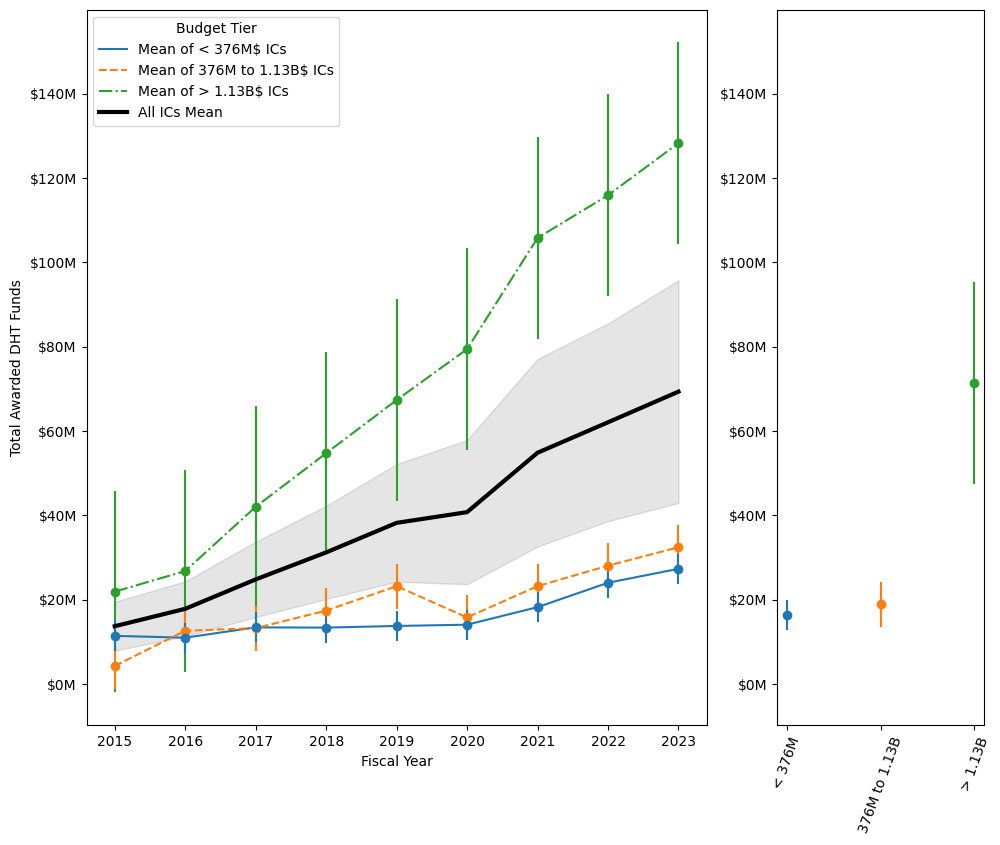

In [17]:
dfTmp=df.reset_index([0,1])
df_piv_m=pd.pivot_table(dfTmp, index=['Budget Tier'], columns='Fiscal Year', values='DHT$',aggfunc=['mean'])
#df_piv_m=pd.pivot_table(dfTmp, index=['Fiscal Year'], columns='Budget Tier', values='DHT$',aggfunc=['mean'])

df_piv_m.columns = df_piv_m.columns.get_level_values(1)
lst = ["< 376M", "376M to 1.13B", "> 1.13B"]
df_piv_m = df_piv_m.loc[lst]
df_piv_sd=pd.pivot_table(dfTmp, index=['Budget Tier'], columns='Fiscal Year', values='DHT$',aggfunc=['std'])
df_piv_sd.columns = df_piv_sd.columns.get_level_values(1)
df_piv_sd = df_piv_sd.loc[lst]

#main plot, lines of each tier:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 8))
fig.tight_layout(pad=2)
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10) #plot.area(...., stacked=False)#lw=linewidth

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['11.5B+']-ci), (df_piv_m.T['11.5B+']+ci), color=colors[0], alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['3.6 to 11.5B']-ci), (df_piv_m.T['3.6 to 11.5B']+ci), color=colors[1], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
#ax[0].fill_between(df_piv_m.columns, (df_piv_m.T['less 3.6B']-ci), (df_piv_m.T['less 3.6B']+ci), color=colors[2], alpha=.1)
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])

#grand mean plot and error:
df_mean=np.mean(fundsIC_all, axis=0)
ci = 1.96 * np.std(fundsIC_all)/np.sqrt(len(fundsIC_all.index))
ax[0].plot(df_mean.T,linewidth=3, color='k',linestyle='-')
ax[0].fill_between(df_mean.index, (df_mean-ci), (df_mean+ci), color='k', alpha=.1)

#nicify left plot
ylims=ax[0].get_ylim()
fig.set_ylabel('Total Awarded DHT Funds')
leg = fig.legend(loc="upper left")
leglist = df_piv_m.index.to_list()
for i, txt in enumerate(leglist):
    leglist[i] = 'Mean of ' + txt + '$ ICs'
legendText=list(leglist)
legendText.append('All ICs Mean')
leg = fig.legend(legendText,loc="upper left", title="Budget Tier")#, loc=0, frameon=True)
#leg.set_title(")

##sideplot with IC means
#vals=fundsSubset.loc[list(fundsSubset.index)[:], list(fundsSubset.columns)].mean(axis=1)
vals = df_piv_m.mean(axis=1)
print(vals)
barerr=1.96*np.std(df_piv_m,axis=1)/np.sqrt(len(list(df_piv_m.columns)))
x=list(df_piv_m.index)[:]
marks=vals
for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    plt.errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)
plt.xticks(rotation=70)

#change ytick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[1].get_yticklabels()]
print(labels)
labels = ['$' + str(round(float(item)*100)) + 'M' for item in labels[1:]]
labels.insert(0,'$-250M')
print(labels)
[ax[i].set_yticklabels(labels) for i in range(2)]

print('/n==========FIGURE 2===========/n')
plt.show()
fig.figure.savefig(outpath + 'Figure2_mHealthFundingByBudgetTier_sideplotAvgBar_totalGrants.tiff', dpi=600,bbox_inches='tight') #

# Figure 3. Total Funding for DHT Grants as a Percentage of Total IC Budget according to ICs Tier from FY2015 to FY 2023

In [19]:
#convert percentage
df['percentBudg']=(df['DHT$']/df.Budget)*100
print(df)
#output spreadsheet
df.to_csv(outpath + 'mHealthFundingByIC_percentOverall_totalGrants.csv')

                     Admin IC Short        DHT$      Budget    budgetMean  \
Admin IC Fiscal Year                                                        
FIC      2015                    TW   3142955.0    77474918  8.243364e+07   
         2016                    TW   4004387.0    68595980  8.243364e+07   
         2017                    TW   6647302.0    71382502  8.243364e+07   
         2018                    TW   6633309.0    80666953  8.243364e+07   
         2019                    TW   8061701.0    81922565  8.243364e+07   
...                             ...         ...         ...           ...   
OD       2019                    OD  54892673.0  1004091774  9.355206e+08   
         2020                    OD  10251048.0  1132605378  9.355206e+08   
         2021                    OD  51188384.0  1174679362  9.355206e+08   
         2022                    OD  33919651.0  1248671608  9.355206e+08   
         2023                    OD  72279909.0  1389381330  9.355206e+08   

25
totals mean ci =  Fiscal Year
2015    5.799052e+06
2016    6.527579e+06
2017    8.946518e+06
2018    1.104038e+07
2019    1.393949e+07
2020    1.709633e+07
2021    2.224145e+07
2022    2.344596e+07
2023    2.641188e+07
dtype: float64
legendText =  ['< 376M', '376M to 1.13B', '> 1.13B', 'All ICs %DHT Mean', 'NIH Total (right-axis)']
['−1.0', '−0.5', '0.0', '0.5', '1.0', '1.5', '2.0']
2 − 0.0
3 − 0.5
4 − 1.0
5 − 1.5
6 − 2.0
['', '', '$0M', '$500M', '$1.0B', '$1.5B', '$2.0B']


C:\Users\radmantc\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\946656910.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(labels)


Budget Tier
< 376M           8.692528
376M to 1.13B    3.207866
> 1.13B          3.316118
dtype: float64
9
/n==========FIGURE 3===========/n


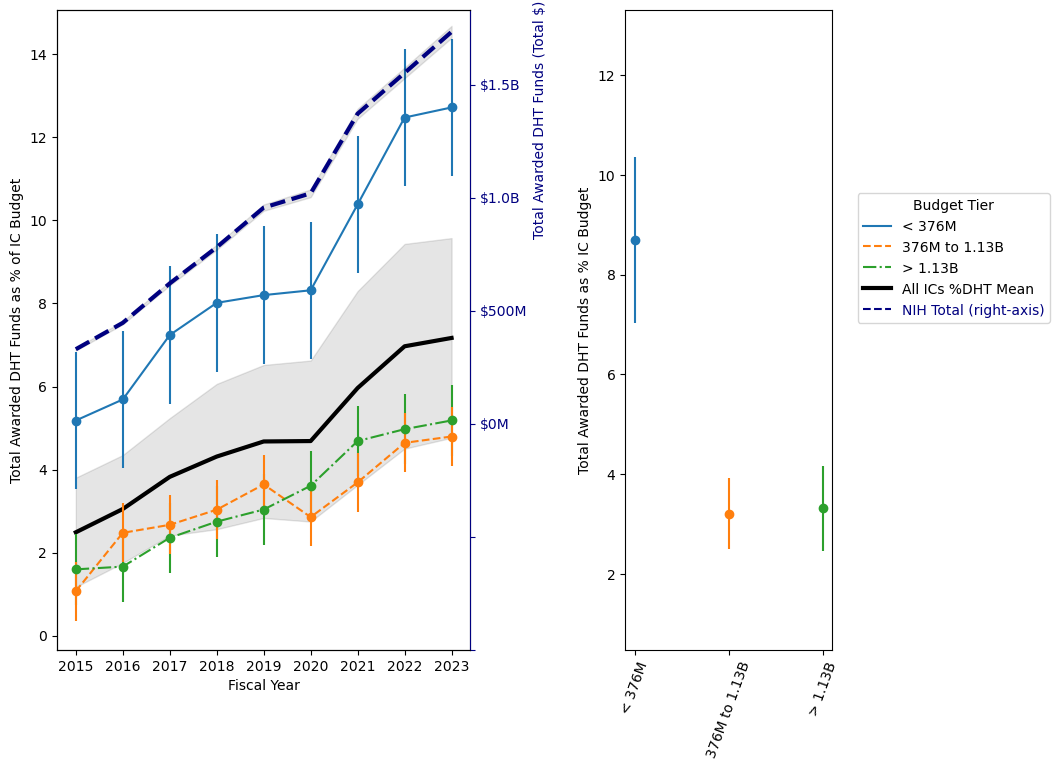

In [20]:
#percent tiers plot, with 2nd axis with nih total spending:
df=df.reset_index([0,1])

df_piv_m=pd.pivot_table(df, index=['Budget Tier'], columns='Fiscal Year', values='percentBudg',aggfunc=['mean'])
df_piv_m.columns = df_piv_m.columns.get_level_values(1)
lst = ["< 376M", "376M to 1.13B", "> 1.13B"]
df_piv_m = df_piv_m.loc[lst]
df_piv_sd=pd.pivot_table(df, index=['Budget Tier'], columns='Fiscal Year', values='percentBudg',aggfunc=['std'])
df_piv_sd.columns = df_piv_sd.columns.get_level_values(1)
df_piv_sd = df_piv_sd.loc[lst]

#redo above percent tiers plot, but add 2nd axis with nih total spending:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [6, 3]}, figsize=(10, 8))
fig.tight_layout() #pad=2.5)

# set the spacing between subplots
plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
    right = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,  # the bottom of the subplots of the figure
    top = 0.9,     # the top of the subplots of the figure
    wspace = .5,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2,  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
)
ax2 = ax[0].twinx()


#main plot, lines of each tier:
linestyle = ["-"]*1 + ["--"]*1 + ["-."]*1
fig=df_piv_m.T.plot(ax=ax[0] , style=linestyle, fontsize=10) 

#conf. int. for tiers:
lines=fig.get_lines()# [0].get_color() 
colors = [line.get_color() for line in lines]

#grand mean plot and error:
df_pivot=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='percentBudg')

df_percmean=np.mean(df_pivot, axis=0)
print(len(fundsIC_all.index))
ax[0].plot(df_percmean,linewidth=3, color='k',linestyle='-')
#leg = fig.legend(loc="upper left")
#leg.set_title("Budget Tier")
#legendText=list(df_piv_m.index)
#legendText.append('All ICs Mean')
#fig.legend(legendText, loc='lower left', frameon=True,bbox_to_anchor=(.1, .85))
#leg2=fig.legend(legendText, loc='lower left',bbox_to_anchor=(.92, .5)) #1.0, 0.5))

#nicify left plot
ylims=ax[0].get_ylim()
fig.set_ylabel('Total Awarded DHT Funds as % of IC Budget')

#2nd axis with NIH total spending (not %):
df_total_all=pd.pivot(df, index='Admin IC', columns='Fiscal Year', values='DHT$')
totals=df_total_all.sum(axis=0)
ax2.plot(totals.index,totals,linewidth=3, color='navy',linestyle='--')
ax[0].plot(np.NaN, np.NaN, color='navy',linestyle='--', label='') #this is needed so there is an extra index in the legend
ci = 1.96 * np.std(df_total_all)/np.sqrt(len(df_total_all.index))
print('totals mean ci = ',ci)
ax2.fill_between(totals.index, (totals-ci), (totals+ci), color='k', alpha=.1)
ax2.set_ylim(bottom=-1000000000, top=ax2.get_ylim()[1])

#leg = fig.legend(frameon=False)#loc="upper left")
#leg.remove()
#fig.legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()
legendText=list(lst)
legendText.append('All ICs %DHT Mean'); 
#legendText.append(''); 
legendText.append('NIH Total (right-axis)');
print('legendText = ',legendText)
#fig.legend(legendText, loc=4,frameon=True)
leg2=fig.legend(legendText, loc='lower left',bbox_to_anchor=(1.92, .5), title="Budget Tier") #1.0, 0.5))
leg2.get_figure()
#spaces added below to center text on 2nd axis:
ax2.set_ylabel('                                                                                                ' +
             'Total Awarded DHT Funds (Total $)')
#change last item text color:
texts = leg2.get_texts()
texts[-1].set_color("navy")

#left plot, percent mean errorbars (has to be after legend to preserve order of lines):
ci = 1.96 * np.std(df_pivot)/np.sqrt(len(fundsIC_all.index))
ax[0].fill_between(df_percmean.index, (df_percmean-ci), (df_percmean+ci), color='k', alpha=.1)
ci = 1.96 * np.std(df_piv_m.T['> 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['> 1.13B'],yerr=ci, fmt ='o', color=colors[2])
ci = 1.96 * np.std(df_piv_m.T['376M to 1.13B'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['376M to 1.13B'],yerr=ci, fmt ='o', color=colors[1])


#change 2nd ytick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax2.get_yticklabels()]
print(labels)
for i,clab in enumerate(labels):
    if clab[0]!='\N{MINUS SIGN}':
        print(i,'\N{MINUS SIGN}',clab)
        labels[i]=float(clab)
        if labels[i]>=1.0:
            #labels[i]='$' + str(round(labels[i])) + 'B'
            labels[i]='$' + str((labels[i])) + 'B'

        else:
            labels[i]='$' + str(round(labels[i]*1000)) + 'M'
    else:
        labels[i]='' 
print(labels)
ax2.set_yticklabels(labels)
ax2.spines['right'].set_color('navy')
ax2.tick_params(axis='y', colors='navy')
ax2.yaxis.label.set_color('navy')
ci = 1.96 * np.std(df_piv_m.T['< 376M'])/np.sqrt(len(df_piv_m.columns)) #11.5B+  3.6 to 11.5B     less 3.6B
ax[0].errorbar(x=df_piv_m.columns,y=df_piv_m.T['< 376M'],yerr=ci, fmt ='o', color=colors[0])


##sideplot with IC means
#vals=fundsSubset.loc[list(fundsSubset.index)[:], list(fundsSubset.columns)].mean(axis=1)
vals = df_piv_m.mean(axis=1)
print(vals)
print(len(list(df_piv_m.columns)))
barerr=1.96*np.std(df_piv_m,axis=1)/np.sqrt(len(list(df_piv_m.columns)))
x=list(df_piv_m.index)[:]
marks=vals
for pos, y, err, ccolor in zip(x, marks,
                               barerr, colors):
    ax[1].errorbar(x=pos,y=y,yerr=err, fmt ='o', color=ccolor)
ax[1].set_ylim(ylims)
ax[1].tick_params(axis='x', rotation=70)
ax[1].set_ylabel('Total Awarded DHT Funds as % IC Budget')

print('/n==========FIGURE 3===========/n')

plt.show()
fig.figure.savefig(outpath + 'Figure3_mHealthFundingByBudgetTier_percent_sideplotAvgBar_wNIHtotals_totalGrants.tiff', dpi=600,bbox_inches='tight') #


# Supplemental Figure 1a and b. Overall DHT awards distribution by grant type from 2015-2023 (pie chart and bar chart)

In [21]:
#mean of mhealth funding by IC/Year and grant Mechanism through pivot table
mechYrByIC=pd.pivot_table(dfi,index=["Administering IC", "Fiscal Year"],columns=["Activity"],values="Total Cost",aggfunc=np.sum)
mechYrByIC.to_csv(outpath + 'mHealthFundingByMechYearIC.csv')

mechYrByIC.xs('NCATS') #.index['Admin IC']
#mechYrByIC.iloc[df.columns.get_level_values('Admin IC') == 'TR']

C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\941254976.py:2: FutureWarning: The provided callable <function sum at 0x0000019E683FD440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mechYrByIC=pd.pivot_table(dfi,index=["Administering IC", "Fiscal Year"],columns=["Activity"],values="Total Cost",aggfunc=np.sum)


Activity,C06,D43,DP1,DP2,DP3,DP5,DP7,F30,F31,F32,...,UB1,UE5,UF1,UG1,UG3,UH2,UH3,UH4,UL1,UM1
Fiscal Year,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23097598.0,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21299562.0,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27443730.0,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25141320.0,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34614228.0,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43817455.0,NaN
2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,693765.0,NaN,NaN,NaN,71247391.0,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,688274.0,NaN,NaN,NaN,65328777.0,4023408.0


In [22]:
#we will need IC acronym on mechYrByIC:
tmp=mechYrByIC.stack(0).reset_index(level=1) 
tmp.rename(columns={0:'DHT$'}, inplace=True)
tmp=tmp.reset_index(level=1) 
IC['Admin IC'] = IC['Admin IC Long']
tmp=IC.join(tmp, on='Admin IC')
print(tmp)

   Admin IC Long Admin IC Short Admin IC Activity  Fiscal Year        DHT$
0            FIC             TW      FIC      D43         2015    491290.0
0            FIC             TW      FIC      R21         2015   1140149.0
0            FIC             TW      FIC      R25         2015    751742.0
0            FIC             TW      FIC      U01         2015    759774.0
0            FIC             TW      FIC      D43         2016    228824.0
..           ...            ...      ...      ...          ...         ...
24            OD             OD       OD      OT2         2023  45563172.0
24            OD             OD       OD      R43         2023    395558.0
24            OD             OD       OD      U24         2023   3499985.0
24            OD             OD       OD      UG1         2023   1991327.0
24            OD             OD       OD      UG3         2023  12176871.0

[2579 rows x 6 columns]


In [23]:
#join mechYrByIC with budget
tmp.rename(columns={'Admin IC Long':'Acronym'}, inplace=True)
tmp.set_index(['Acronym','Fiscal Year'], inplace=True) #bring back year column into index for join
df=tmp.join(budgetsTmp)

In [24]:
#convert percentage
df['percentBudg']=(df['DHT$']/df.Budget)*100
print(df)
#output spreadsheet
df.to_csv(outpath + 'mHealthFundingByIC_percentOverall_totalGrants.csv')

                    Admin IC Short Admin IC Activity        DHT$      Budget  \
Acronym Fiscal Year                                                            
FIC     2015                    TW      FIC      D43    491290.0    77474918   
        2015                    TW      FIC      R21   1140149.0    77474918   
        2015                    TW      FIC      R25    751742.0    77474918   
        2015                    TW      FIC      U01    759774.0    77474918   
        2016                    TW      FIC      D43    228824.0    68595980   
...                            ...      ...      ...         ...         ...   
OD      2023                    OD       OD      OT2  45563172.0  1389381330   
        2023                    OD       OD      R43    395558.0  1389381330   
        2023                    OD       OD      U24   3499985.0  1389381330   
        2023                    OD       OD      UG1   1991327.0  1389381330   
        2023                    OD      

## Supplemental Table 5 (needed for Supp. Fig. 1)  : Listing of grant codes to group into grant categories:

In [25]:
codes=[]
label = ['Research Project Grants']
codes.append(['UH4','UE5','RM1','DP1','U2R', 'DP2', 'DP3', 'DP5', 'P01', 'R00', 'R01', 'R03', 'R15', 'R18', 'R21', 'R24', 'R25', 'R33', 'R34', 'R35', 'R36', 'R37', 'R56', 'R61', 'RC2', 'RF1', 'U2C', 'UF1', 'UG1', 'UG3', 'UH2', 'UH3', 'UM1', 'U01', 'U10', 'U18', 'U19', 'U24', 'U34', 'U45'])

label.append('Research Center Grants')
codes.append(['U41','R16','P42','P20', 'P2C', 'P30', 'P41', 'P50', 'U54', 'UL1'])

label.append('Training and Career Development')
#codes.append(['KL2', 'TL1', 'K00', 'T15' 'D43', 'DP2', 'DP3', 'DP5', 'F30', 'F31', 'F32', 'F99','K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K43', 'K76', 'K99', 'T32', 'T35'])
codes.append(['T15', 'K26','KL2', 'TL1', 'K00','D43', 'F30', 'F31', 'F32', 'F99', 'K01', 'K02', 'K07', 'K08', 'K12', 'K18', 'K22', 'K23', 'K24', 'K25', 'K43', 'K76', 'K99', 'T32', 'T35'])

label.append('SBIR/STTR')
codes.append(['R43', 'R44', 'SB1', 'U43', 'U44', 'R41', 'R42'])

label.append('Other')
codes.append(['C06','G08', 'G12', 'G13', 'G20', 'S10', 'R13', 'OT2'])

df['codetype'] = 'Other'
df.loc[df['Activity'].str.contains('|'.join(codes[0])), 'codetype'] = label[0] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity'].str.contains('|'.join(codes[1])), 'codetype'] = label[1] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity'].str.contains('|'.join(codes[2])), 'codetype'] = label[2] #Conditional that returns a boolean Series with column labels specified
df.loc[df['Activity'].str.contains('|'.join(codes[3])), 'codetype'] = label[3] #Conditional that returns a boolean Series with column labels specified

In [26]:
df[df.codetype=='Other']['Activity'].unique()

array(['G11', 'R13', 'OT2', 'U13', 'FI2', 'G12', 'P60', 'UB1', 'G08',
       'G13', 'G20', 'DP7', 'C06'], dtype=object)

In [27]:
#b. mean of mhealth funding %budget by IC/Year/Code Type through pivot table
mHealthFundsMech=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum)
mHealthFundsMech.to_csv(outpath +'mHealthFundingByCodeType_Avg_totalGrants.csv')

C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\1117385150.py:2: FutureWarning: The provided callable <function sum at 0x0000019E683FD440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsMech=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum)


## Now we are ready to plot Supplemental Figure 1a and b:

processing:  84327307.0 Other
0 1.0%
processing:  979026311.0 Research Center Grants
1 11.1%
processing:  6750719398.0 Research Project Grants
processing special $B case:  6750719398.0 Research Project Grants
2 76.7%
processing:  632229712.0 SBIR/STTR
3 7.2%
processing:  358990985.0 Training and Career Development
4 4.1%
0 Text(-0.01804928315575562, 0.5997284580354374, '        $84M : 1.0%') 37.0
1 Text(-0.23887655868925856, 0.5503980284383087, '$979M : 11.1%         ') 37.0
2 Text(0.015439800747623352, -0.5998013108962614, '        $6.75B : 76.7%') 37.0
3 Text(0.27799033285697156, 0.5317155017846199, '        $632M : 7.2%') 37.0
4 Text(0.07663960232734884, 0.595085179915536, '        $359M : 4.1%') 37.0


C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2939499351.py:3: FutureWarning: The provided callable <function sum at 0x0000019E683FD440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsCode=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum).sum()
C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2939499351.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('processing: ', mHealthFundsCode[i], pie_labels[i])
C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2939499351.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as 

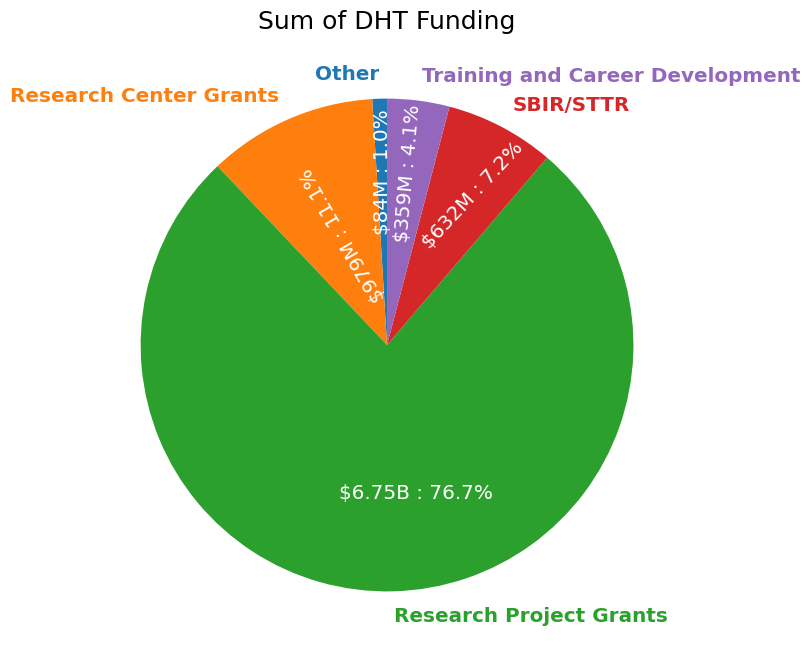

In [28]:
#Supp Fig 1a
#pie chart for sum of funding by category
mHealthFundsCode=pd.pivot_table(df,index=["Admin IC"],columns=["codetype"],values="DHT$",aggfunc=np.sum).sum()
#mHealthFundsCode.plot.pie(ylabel='',title='Sum of DHT Funding',autopct='%.1f%%')

###side by side pie chart

#fix labels per 4/25/24 request:
pie_labels = list(mHealthFundsCode.index)
#pie_labels[ pie_labels.index('Research Projects') ] = 'Research Projects/\nResearch Center'

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
patches, texts, pcts = axs.pie(
    mHealthFundsCode, labels=pie_labels, autopct='%.1f%%',
    #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
from decimal import Decimal
for i, patch in enumerate(patches):
    print('processing: ', mHealthFundsCode[i], pie_labels[i])

    texts[i].set_color(patch.get_facecolor())
    #csum='$%.2E' % Decimal(mHealthFundsCode[i].round() ) #XXE8, E7 etc
    #csum= '$' + str(round(mHealthFundsCode[i]))
    if mHealthFundsCode[i] > 1E+09:
        print('processing special $B case: ', mHealthFundsCode[i], pie_labels[i])
        csum= '$' + str(round(mHealthFundsCode[i]/1E+09, 2))+ 'B' #XXE8, E7 etc
    else:
        csum= '$' + str(round(mHealthFundsCode[i].round()/1E+08*100))+ 'M' #XXE8, E7 etc
    print(i, pcts[i].get_text())
    cpct=pcts[i].get_text()
    if i==1:
        pcts[i].set_text('' + csum  + ' : ' + cpct + '         ')
    else:
        pcts[i].set_text('        ' + csum  + ' : ' + cpct)
#plt.setp(pcts, color='white',rotation='vertical')
plt.setp(pcts, color='white',rotation=37) #'37')
for ipct, tx in enumerate(pcts):
    rot = tx.get_rotation()
    print(ipct, tx, rot)
    if ipct==0:
        tx.set_rotation(90)
    if ipct==1:
        tx.set_rotation(120)
    if ipct==2:
        tx.set_rotation(0)
    if ipct==3:
        tx.set_rotation(47)
    if ipct==4:
        tx.set_rotation(85)
plt.setp(texts, fontweight=600)
axs.set_title('Sum of DHT Funding', fontsize=18)
#plt.tight_layout()
fig.figure.savefig(outpath + 'SuppFig1a_mHealthFunds_grantCts_pie1_funding_totalGrants.tiff', dpi=600) #

plt.show()

#plt.setp(pcts) #this lists all settable properties

C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2021852697.py:5: FutureWarning: The provided callable <function sum at 0x0000019E683FD440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsRPG=pd.pivot_table(df2,columns=["Activity"],values="DHT$",aggfunc=np.sum).sum()
C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2021852697.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels)
C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2021852697.py:19: FutureWarning: The provided callable <function sum at 0x0000019E683FD440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  mHealthFundsRPG=pd.pivot_table(df2,col

['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']
['$0.0B', '$0.5B', '$1.0B', '$1.5B', '$2.0B', '$2.5B', '$3.0B', '$3.5B']
['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']
['$0M', '$50M', '$100M', '$150M', '$200M', '$250M', '$300M', '$350M']


C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\2021852697.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels)


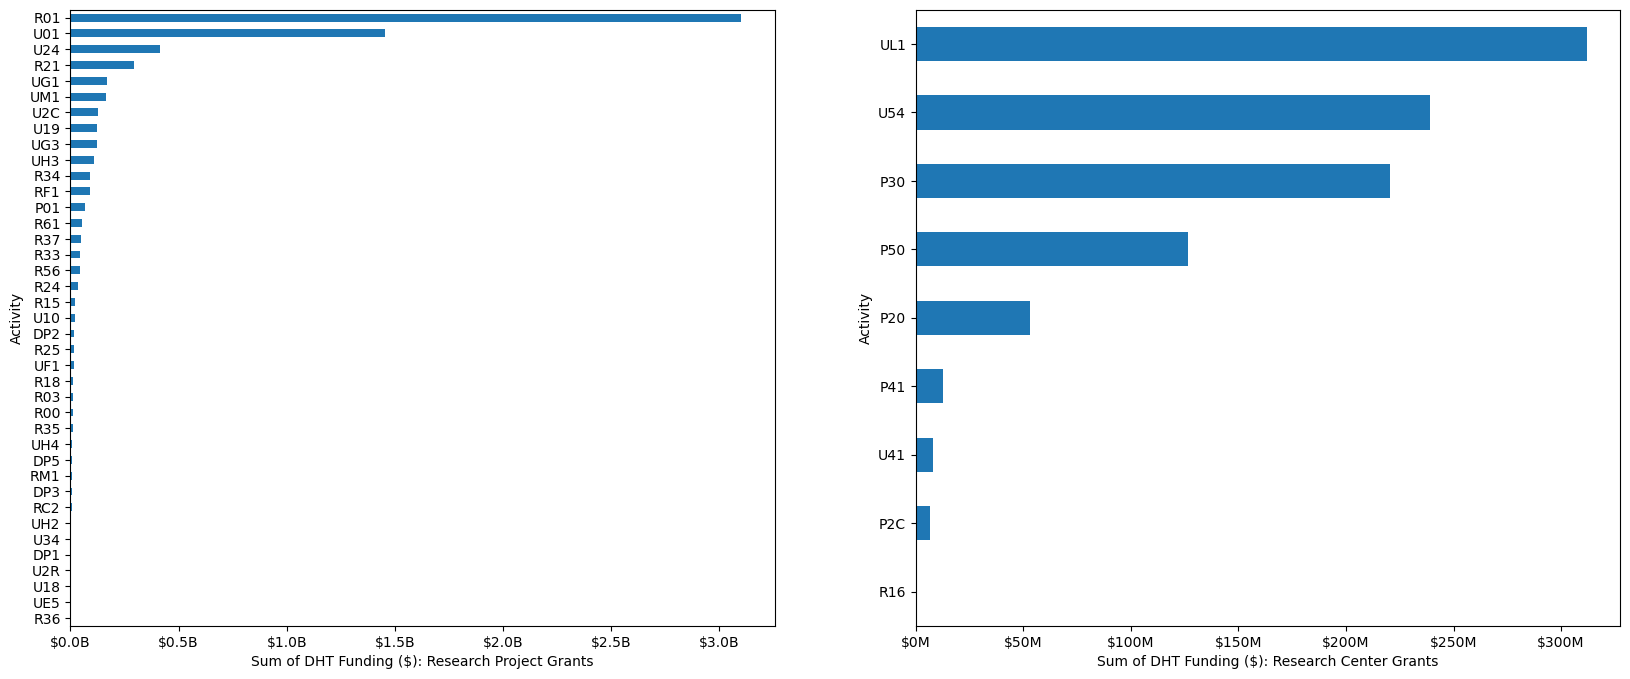

In [29]:
#Supplemental Figure 1b
#bar plot with IC x Infra/RPG grouping
fig, ax = plt.subplots(1,2,figsize=(20, 8))
df2=df[ df["codetype"]=='Research Project Grants' ]
mHealthFundsRPG=pd.pivot_table(df2,columns=["Activity"],values="DHT$",aggfunc=np.sum).sum()
plt.subplot(1, 2, 1)
mHealthFundsRPG.sort_values().plot.barh(xlabel='Sum of DHT Funding ($): Research Project Grants')#,autopct='%.1f%%',)
#change xtick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[0].get_xticklabels()]
print(labels)
labels = ['$' + str((float(item)*1)) + 'B' for item in labels[:]] #1E8 = 1 * 10^8 = 100,000,000 
print(labels)
ax[0].set_xticklabels(labels)
#mHealthFundsRPG.sort_values().to_csv(outpath + '\\Outputs\\perActCode\\' + 'mHealthFundsbyActCode_RPG.csv')


df2=df[ df["codetype"]=='Research Center Grants' ]
mHealthFundsRPG=pd.pivot_table(df2,columns=["Activity"],values="DHT$",aggfunc=np.sum).sum()
plt.subplot(1, 2, 2)
mHealthFundsRPG.sort_values().plot.barh(xlabel='Sum of DHT Funding ($): Research Center Grants')
#change xtick labels to remove 1e8 notation:
plt.draw()
labels = [item.get_text() for item in ax[1].get_xticklabels()]
print(labels)
labels = ['$' + str(round(float(item)*100)) + 'M' for item in labels[:]] #1E7 = 1 * 10^7 = 10,000,000
#labels = ['$' + str((float(item)*1)) + 'B' for item in labels[:]] #1E7 = 1 * 10^7 = 10,000,000

print(labels)
ax[1].set_xticklabels(labels)
mHealthFundsRPG.sort_values().to_csv(outpath + 'SuppFig1b_mHealthFundsbyActCode_ResCenters.csv')


fig.figure.savefig(outpath + 'SuppFig1b_mHealthFundsbyActCode_ProjAndCenter_totalGrants.tiff', dpi=600) #


# Supplemental Figure 2. DHT according to DHT Category (pie chart)

## Supp. Fig. 2, Step a) Deduplicate Grants:

In [30]:
#sort by grant number, fy, appl id and type
dfi_st=dfi.loc[dfi['Type'].isin([1, 2, 5])]
#df.loc[df['col1'].isin([value1, value2, value3, ...])]
dfi_st=dfi_st.sort_values(['Project Number', 'Fiscal Year', 'Application ID', 'Type'])

dfi_st[['Project Number', 'Fiscal Year', 'Application ID', 'Type']]

,Project Number,Fiscal Year,Application ID,Type
354,1C06OD036020-01,2023,10795328,1
1396,1D43TW012481-01,2023,10676557,1
1397,1D43TW012481-01,2023,10676557,1
3607,1DP1AG082343-01,2022,10487819,1
5949,1DP2AI164315-01,2021,10295403,1
...,...,...,...,...
13305,5UM1CA182913-04,2017,9338194,5
11890,5UM1CA182913-05,2018,9552089,5
9372,5UM1DA049406-02,2020,9917748,5
7548,5UM1DA049406-03,2021,10142414,5


In [31]:
dfi_st['Grant Number']=[proj.split('-')[0] for proj in dfi_st['Project Number']]
print(dfi_st['Grant Number'])
grant_nums=dfi_st['Grant Number'].unique()
dfi_dedup = pd.DataFrame(index=range(len(grant_nums)),columns=dfi_st.columns) 

#ignore warnings:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

i=0
for grant in grant_nums:
    cgrants=dfi_st[dfi_st['Grant Number']==grant]
    dfi_dedup.iloc[i] = cgrants.iloc[0]
    i+=1

354      1C06OD036020
1396     1D43TW012481
1397     1D43TW012481
3607     1DP1AG082343
5949     1DP2AI164315
             ...     
13305    5UM1CA182913
11890    5UM1CA182913
9372     5UM1DA049406
7548     5UM1DA049406
5067     5UM1DA049406
Name: Grant Number, Length: 13171, dtype: object


In [32]:
#the following block is needed only if you plan on assigning manual verification to co-authors:
#add column of random numbers and assign curators
import random
dfi_dedup['rand_ix'] = random.sample(range(len(dfi_dedup)), len(dfi_dedup))
dfi_dedup=dfi_dedup.set_index('rand_ix')

In [33]:
dfi_dedup.to_csv(outpath + 'dedup_' + inputname + '.csv')

In [34]:
dfi_dedup[['Grant Number', 'Fiscal Year', 'Application ID', 'Type']]

,Grant Number,Fiscal Year,Application ID,Type
rand_ix,,,,
4892,1C06OD036020,2023,10795328,1
398,1D43TW012481,2023,10676557,1
780,1DP1AG082343,2022,10487819,1
5358,1DP2AI164315,2021,10295403,1
4479,1DP2DA040226,2015,8966769,1
...,...,...,...,...
4544,5UL1TR004419,2023,10662572,5
6245,5UM1AI068617,2022,10306322,5
5720,5UM1AR063381,2015,8903698,5


## Supplemental Table 2 (needed for Supp. Fig. 2): 
### 	Search Terms per Category Name


In [35]:
#append column to db that indicates count of terms (putting some into same category)
terms=[
    ["decentralized trial", "remote trial", "virtual trial"],
    ['digital health' , 'digital health technology' , 'digital health technologies'],
    ['mobile app' , 'mobile application' , 'mobile health' , 'mobile health technology', 'mobile health technologies' , 'mhealth'],
    ['smart connected health' , 'remote patient monitoring' , 'connected home health'],
    ['wearable device' , 'wearable'],
    ['remote healthcare delivery' , 'virtual care' , 'digital patient engagement' , 'telehealth' , 'telemedicine']
]
categories=['Trials','Digital Health','Mobile', 'Connected', 'Wearables' , 'Telehealth']

In [36]:
#counts of categories
ngrants=dfi_dedup.shape[0]
for ix,ccat in enumerate(categories):
    catcounts=[0]*ngrants #placeholder for counts per category
    for term in terms[ix]:
        catcounts=catcounts+dfi_dedup['Project Title'].fillna('').apply(str.lower).str.count(term)+dfi_dedup['Project Abstract'].fillna('').apply(str.lower).str.count(term)
    dfi_dedup['cts_' + ccat]=catcounts 
    
dfi_dedup.to_csv(outpath + 'iSearchTermCounts.csv')


In [37]:
dfi_mask=dfi_dedup.iloc[: , -6:]>0
dfi_mask.columns=dfi_mask.columns.str.replace('cts_','')
dfi_mask=dfi_mask.add_prefix('mask_')
dfi_mask

,mask_Trials,mask_Digital Health,mask_Mobile,mask_Connected,mask_Wearables,mask_Telehealth
rand_ix,,,,,,
4892,False,False,False,False,False,True
398,False,True,False,False,False,False
780,False,False,False,False,True,False
5358,False,False,True,False,False,False
4479,False,False,True,False,False,False
...,...,...,...,...,...,...
4544,False,True,False,False,False,False
6245,False,False,True,False,False,False
5720,False,False,False,False,False,False


In [38]:
grantCts=dfi_mask.sum()
grantPct=round((grantCts/ngrants)*100,1)
grantPct.index=['Trials', 'Digital Health     ','Mobile','Connected','Wearables','Telehealth']

## Plot Supplemental Figure 2:

C:\Users\radmantc\AppData\Local\Temp\ipykernel_16992\3651837039.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  csum=str(grantCts[i])


        7 : 0.2%
        386 : 7.5%
        2334 : 45.0%
        34 : 0.6%
        1392 : 26.8%
        1036 : 20.0%


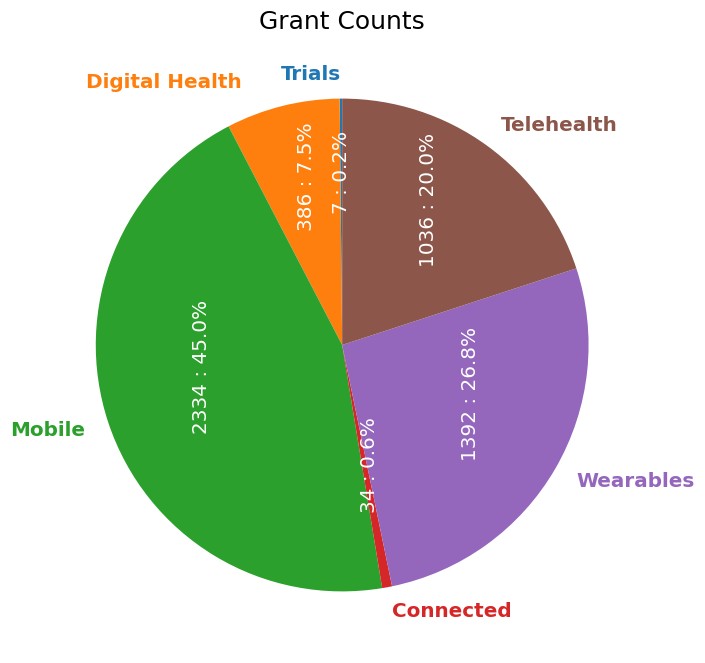

In [39]:
#pie chart of grant categories (from data derived at top of notebook)
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
patches, texts, pcts = axs.pie(
    grantPct, labels=grantPct.index, autopct='%.1f%%',
    #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
from decimal import Decimal
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    csum=str(grantCts[i])
    cpct=pcts[i].get_text()
    pcts[i].set_text('        ' + csum  + ' : ' + cpct)
    print(pcts[i].get_text())
plt.setp(pcts, color='white',rotation='vertical')
plt.setp(texts, fontweight=600)
axs.set_title('Grant Counts', fontsize=18)
#plt.tight_layout()

fig.figure.savefig(outpath + 'SuppFig2_mHealthFunds_grantCts_pie2_cats.tiff', dpi=600) #

# Supplemental Figure 4.  Most frequent words by DHT Area of Interest in the NIH DHT portfolio from 2015 – 2023

## Supp. Fig. 4, step a) read in and process dataframe of manual curations downloaded from iSearch curations system and individual curations combined into final votes (aka "derived")

### Curation was not conducted for NIH Reporter data.  Please refer to the iSearch script in Github.